<a href="https://colab.research.google.com/github/sashwot/DataScience/blob/main/IMAGE_CLASSIFICATION_TO_ENHANCE_SATELLITE_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION PROJECT TO ENHANCE SATELLITE IMAGE

In [ ]:
import cv2
import numpy as np
from skimage import exposure, restoration
import matplotlib.pyplot as plt

# Accessing images from MRO (Mars Reconnaissance Orbiter)

## USING NASA API

In [ ]:
import requests
API_KEY = "FBXx1cmiamlSvEftnwacC4VNVHWFYfboXTepNj4e"
url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol=1000&api_key={API_KEY}"

response = requests.get(url)
data = response.json()

# Print first image URL
if "photos" in data and len(data["photos"]) > 0:
    print(data["photos"][0]["img_src"])
else:
    print("No images available")

http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG


In [ ]:
image_path = data["photos"][5].get("img_src")

## Downloading the image from URL

In [ ]:
from PIL import Image
from io import BytesIO

In [ ]:
response = requests.get(image_path)
image = Image.open(BytesIO(response.content))
image = np.array(image)


# Ensure image has three channels

In [ ]:
if image.shape[-1] == 4:
        image = image[:, :, :3]

# Convert to RGB (in case it's not already in correct format)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Contrast Enhancement using Adaptive Histogram Equalization

In [ ]:
image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])
contrast_enhanced = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

# Noise Reduction using Non-Local Means Denoising

In [ ]:
denoised = cv2.fastNlMeansDenoisingColored(contrast_enhanced, None, 10, 10, 7, 21)

# Sharpening the Image

In [ ]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened = cv2.filter2D(denoised, -1, kernel)

# Histogram Stretching for better contrast

In [ ]:
stretched = exposure.rescale_intensity(sharpened, in_range='image', out_range=(0, 255))

# Display the results

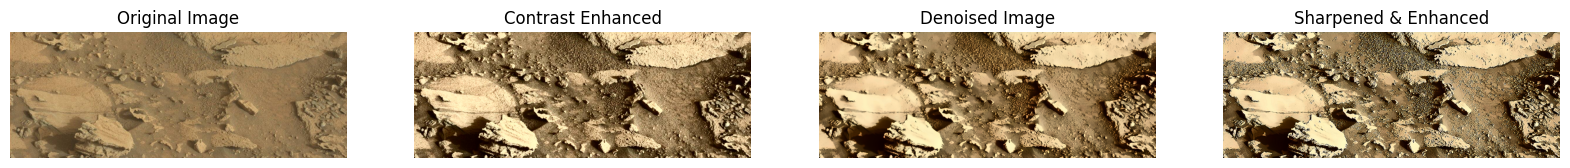

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(contrast_enhanced, cv2.COLOR_BGR2RGB))
ax[1].set_title('Contrast Enhanced')
ax[2].imshow(cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB))
ax[2].set_title('Denoised Image')
# Convert the 'stretched' image to uint8 before displaying it
ax[3].imshow(cv2.cvtColor(stretched.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[3].set_title('Sharpened & Enhanced')
for a in ax:
  a.axis('off')
plt.show()